## Importing The Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

## Load The Dataset

In [ ]:
df=pd.read_csv('drive/MyDrive/Insurance Dataset.csv')
df

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,1169.0,70 or Older,F,Other Race,Spanish/Hispanic,6,Emergency,Skilled Nursing Home,106,29,Cardiac arrhythmia & conduction disorders,2,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1048571,New York City,Bronx,1169.0,0 to 17,F,Other Race,Not Span/Hispanic,2,Emergency,Home or Self Care,8,231,Other infectious & parasitic diseases,2,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1048572,New York City,Bronx,1169.0,50 to 69,M,Other Race,Spanish/Hispanic,13,Emergency,Medicare Cert Long Term Care Hospital,151,88,Hepatic coma & other major acute liver disorders,4,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1048573,New York City,Bronx,1169.0,30 to 49,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,143,86,"Inguinal, femoral & umbilical hernia procedures",1,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(1048575, 24)

In [ ]:
df.size

25165800

In [ ]:
#Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [ ]:
df1=df.drop(['Hospital Id','Area_Service','Cultural_group','ethnicity','Abortion','Tot_cost','Weight_baby'],axis=1)

In [ ]:
df1.shape

(1048575, 17)

## Duplicates

In [ ]:
#Count of duplicated rows
df1[df1.duplicated()].shape


(21686, 17)

In [ ]:
#Print the duplicated rows
df1[df1.duplicated()]

,Hospital County,Age,Gender,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Emergency dept_yes/No,Tot_charg,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
271,Allegany,0 to 17,M,3,Newborn,Home or Self Care,218,115,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,N,2319.75,0.434788,0,1
291,Allegany,0 to 17,F,1,Newborn,Home or Self Care,218,228,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,N,884.50,0.436447,1,1
352,Allegany,0 to 17,F,1,Newborn,Home or Self Care,218,228,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,N,884.50,0.436447,1,1
502,Allegany,0 to 17,M,3,Newborn,Home or Self Care,218,115,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,N,2319.75,0.434788,1,1
533,Allegany,0 to 17,F,2,Newborn,Home or Self Care,218,228,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,N,1401.50,0.431629,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028997,Bronx,0 to 17,F,2,Elective,Home or Self Care,83,227,Seizure,1,1.0,Medical,N,12557.00,0.235996,1,2
1035973,Bronx,0 to 17,F,2,Elective,Home or Self Care,83,227,Seizure,2,1.0,Medical,N,12500.00,0.236809,1,3
1043713,Bronx,0 to 17,M,10,Emergency,Home or Self Care,135,0,"Other gastroenteritis, nausa & vomiting",3,3.0,Medical,Y,65223.50,0.304385,0,3
1044547,Bronx,0 to 17,M,4,Elective,Home or Self Care,83,227,Seizure,1,1.0,Medical,N,24557.00,0.240041,1,2


In [ ]:
#remove the duplicated rows
data=df1.drop_duplicates()

In [ ]:
data.size

17457113

## Missing Values

In [ ]:
data[data.isnull().any(axis=1)]

,Hospital County,Age,Gender,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Emergency dept_yes/No,Tot_charg,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
12,NaN,30 to 49,M,2,Elective,Home or Self Care,126,0,Infections of upper respiratory tract,3,3.0,Medical,Y,2896.70,1.323580,1,1
16,NaN,30 to 49,M,3,Urgent,Home or Self Care,126,0,Infections of upper respiratory tract,1,1.0,Medical,Y,3472.25,1.172107,1,1
33,NaN,70 or Older,F,1,Urgent,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,Y,2509.75,1.050590,1,1
77,NaN,70 or Older,F,3,Elective,Skilled Nursing Home,58,202,"Malnutrition, failure to thrive & other nutrit...",3,2.0,Medical,N,2998.00,1.072593,1,2
86,NaN,30 to 49,F,4,Elective,Home or Self Care,159,0,Kidney & urinary tract infections,2,1.0,Medical,Y,4806.25,1.087221,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044288,NaN,18 to 29,F,1,Emergency,Home or Self Care,180,122,Ectopic pregnancy procedure,1,1.0,Surgical,Y,11398.46,0.196141,0,2
1044417,NaN,30 to 49,F,1,Emergency,Home or Self Care,177,127,"D&C, aspiration curettage or hysterotomy for o...",1,1.0,Surgical,Y,20093.35,0.232213,1,2
1044832,NaN,18 to 29,F,1,Emergency,Home or Self Care,180,122,Ectopic pregnancy procedure,1,1.0,Surgical,Y,9393.39,0.204617,1,3
1045584,NaN,30 to 49,F,1,Emergency,Home or Self Care,177,127,"D&C, aspiration curettage or hysterotomy for o...",1,1.0,Surgical,Y,23802.40,0.248288,0,2


In [ ]:
data = data.rename({'Mortality risk': 'mortalityrisk','ratio_of_total_costs_to_total_charges':'ratio_ofcost_to_charge','Home or self care,':'home_or_selfcare','Emergency dept_yes/No':'emergency_dept' }, axis=1)

In [ ]:
data.isnull().sum()

Hospital County           2455
Age                          0
Gender                       0
Days_spend_hsptl             0
Admission_type               0
home_or_selfcare             0
ccs_diagnosis_code           0
ccs_procedure_code           0
apr_drg_description          0
Code_illness                 0
mortalityrisk               39
Surg_Description             0
emergency_dept               0
Tot_charg                    0
ratio_ofcost_to_charge       0
Result                       0
Payment_Typology             0
dtype: int64

In [ ]:
data['mortalityrisk'].fillna(data.mortalityrisk.median(),inplace=True)

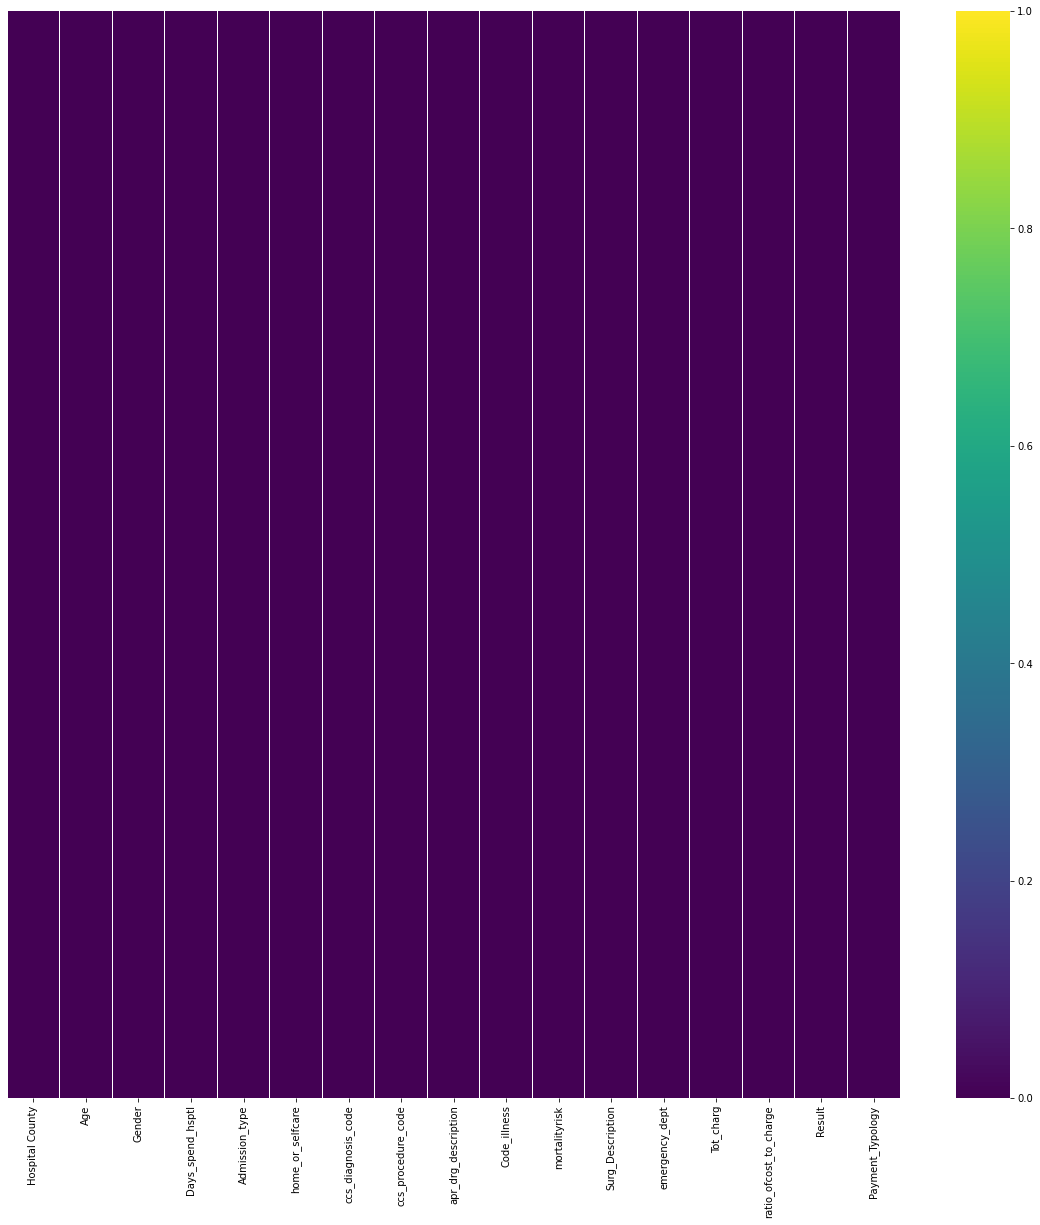

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [ ]:
df=data.dropna()

In [ ]:
df.isnull().sum()

Hospital County           0
Age                       0
Gender                    0
Days_spend_hsptl          0
Admission_type            0
home_or_selfcare          0
ccs_diagnosis_code        0
ccs_procedure_code        0
apr_drg_description       0
Code_illness              0
mortalityrisk             0
Surg_Description          0
emergency_dept            0
Tot_charg                 0
ratio_ofcost_to_charge    0
Result                    0
Payment_Typology          0
dtype: int64

In [ ]:
#Datatype conversion
df['mortalityrisk']=df['mortalityrisk'].astype('int64')
#df['HospitalId']=df['HospitalId'].astype('int64')
#df['Tot_charg']=df['Tot_charg'].astype('int64')
#df['Tot_cost']=df['Tot_cost'].astype('int64')
#df['ratio_ofcost_to_charge']=df['ratio_ofcost_to_charge'].astype('int64')
#df

In [ ]:
df.dtypes

Hospital County            object
Age                        object
Gender                     object
Days_spend_hsptl           object
Admission_type             object
home_or_selfcare           object
ccs_diagnosis_code          int64
ccs_procedure_code          int64
apr_drg_description        object
Code_illness                int64
mortalityrisk               int64
Surg_Description           object
emergency_dept             object
Tot_charg                 float64
ratio_ofcost_to_charge    float64
Result                      int64
Payment_Typology            int64
dtype: object

In [ ]:
df['Days_spend_hsptl'].replace('120 +', 120,inplace=True)

In [ ]:
df['Days_spend_hsptl']=pd.to_numeric(df['Days_spend_hsptl'])

In [ ]:
df['Days_spend_hsptl'].unique()

array([  4,   3,   1,   2,   5,   6,  14,  12,   9,   8,  10,   7,  22,
        11,  16,  15,  25,  13,  17,  28,  18,  19,  23,  38,  20,  24,
        26,  21,  27,  30,  29,  39,  87,  35,  37,  32,  55,  56,  49,
       110,  69,  75,  42,  51,  47,  45,  46,  40,  34,  79,  43, 120,
        65,  41,  31,  50,  59,  44,  36,  70, 115,  58,  94,  33,  68,
        67,  54,  80,  85,  95,  78,  91,  88,  48,  52,  63,  57,  74,
        64,  53,  62,  97,  72, 118,  81,  90,  86, 106, 112, 105, 114,
        66,  89,  83,  84,  82,  93, 116,  71,  60,  73,  61,  92,  76,
        96,  77, 104, 100, 103, 102, 117, 108,  99, 107,  98, 101, 119,
       111, 109, 113])

In [ ]:
x=df.iloc[:, [0,1,2,4,5,8,11,12]]
x

,Hospital County,Age,Gender,Admission_type,home_or_selfcare,apr_drg_description,Surg_Description,emergency_dept
0,Allegany,30 to 49,F,Elective,Home or Self Care,Other pneumonia,Medical,Y
1,Allegany,70 or Older,F,Urgent,Short-term Hospital,Cellulitis & other skin infections,Medical,Y
2,Allegany,30 to 49,F,Urgent,Home or Self Care,Other pneumonia,Medical,Y
3,Allegany,0 to 17,F,Urgent,Home or Self Care,Other pneumonia,Medical,Y
4,Allegany,70 or Older,F,Elective,Home or Self Care,Other pneumonia,Medical,Y
...,...,...,...,...,...,...,...,...
1048570,Bronx,70 or Older,F,Emergency,Skilled Nursing Home,Cardiac arrhythmia & conduction disorders,Medical,Y
1048571,Bronx,0 to 17,F,Emergency,Home or Self Care,Other infectious & parasitic diseases,Medical,N
1048572,Bronx,50 to 69,M,Emergency,Medicare Cert Long Term Care Hospital,Hepatic coma & other major acute liver disorders,Medical,Y
1048573,Bronx,30 to 49,F,Emergency,Home or Self Care,"Inguinal, femoral & umbilical hernia procedures",Surgical,Y


In [ ]:
from sklearn.preprocessing import LabelEncoder
Labelencoder_X= LabelEncoder()
X=x.apply(LabelEncoder().fit_transform)
X

,Hospital County,Age,Gender,Admission_type,home_or_selfcare,apr_drg_description,Surg_Description,emergency_dept
0,1,2,0,0,7,237,0,1
1,1,4,0,5,17,38,0,1
2,1,2,0,5,7,237,0,1
3,1,0,0,5,7,237,0,1
4,1,4,0,0,7,237,0,1
...,...,...,...,...,...,...,...,...
1048570,2,4,0,1,18,28,0,1
1048571,2,0,0,1,7,227,0,0
1048572,2,3,1,1,15,99,0,1
1048573,2,2,0,1,7,109,2,1


In [ ]:
X.dtypes

Hospital County        int64
Age                    int64
Gender                 int64
Admission_type         int64
home_or_selfcare       int64
apr_drg_description    int64
Surg_Description       int64
emergency_dept         int64
dtype: object

In [ ]:
data=df.drop(["Hospital County","Age","Gender","Admission_type","home_or_selfcare","apr_drg_description","Surg_Description","emergency_dept"],axis=1)

In [ ]:
fraud=pd.concat([X,data],axis=1)
fraud

,Hospital County,Age,Gender,Admission_type,home_or_selfcare,apr_drg_description,Surg_Description,emergency_dept,Days_spend_hsptl,ccs_diagnosis_code,ccs_procedure_code,Code_illness,mortalityrisk,Tot_charg,ratio_ofcost_to_charge,Result,Payment_Typology
0,1,2,0,0,7,237,0,1,4,122,0,1,1,5511.95,1.012798,1,1
1,1,4,0,5,17,38,0,1,4,197,0,3,2,4783.20,1.079365,1,1
2,1,2,0,5,7,237,0,1,3,122,0,1,1,3829.15,1.059379,1,1
3,1,0,0,5,7,237,0,1,1,122,0,1,1,1108.20,1.484167,0,1
4,1,4,0,0,7,237,0,1,3,122,0,2,3,3418.18,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,4,0,1,18,28,0,1,6,106,29,2,3,69650.41,0.199522,1,3
1048571,2,0,0,1,7,227,0,0,2,8,231,2,1,13587.38,0.288382,1,3
1048572,2,3,1,1,15,99,0,1,13,151,88,4,4,104629.78,0.236516,0,3
1048573,2,2,0,1,7,109,2,1,2,143,86,1,1,27521.41,0.245846,1,3


In [ ]:
bar = fraud.groupby("Result").count().iloc[:,0]


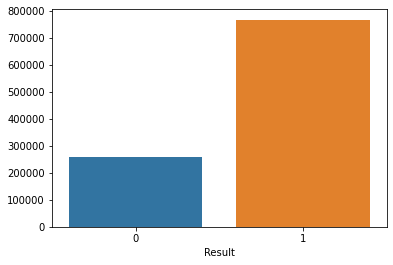

In [ ]:
sns.barplot(x = bar.index, y=bar.values)

In [ ]:
fraud.shape

(1024434, 17)

## Feature Selection(Extra Trees Classifier)

In [ ]:
X = fraud.drop(['Result'],axis = 1)# independent features
y = fraud['Result']# dependent feature

In [ ]:
#Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_)

[0.08154944 0.02849937 0.01010124 0.01036955 0.04132669 0.07062867
 0.00193104 0.00292002 0.10246386 0.08437844 0.05855416 0.02348049
 0.01421467 0.22242625 0.2169011  0.03025502]


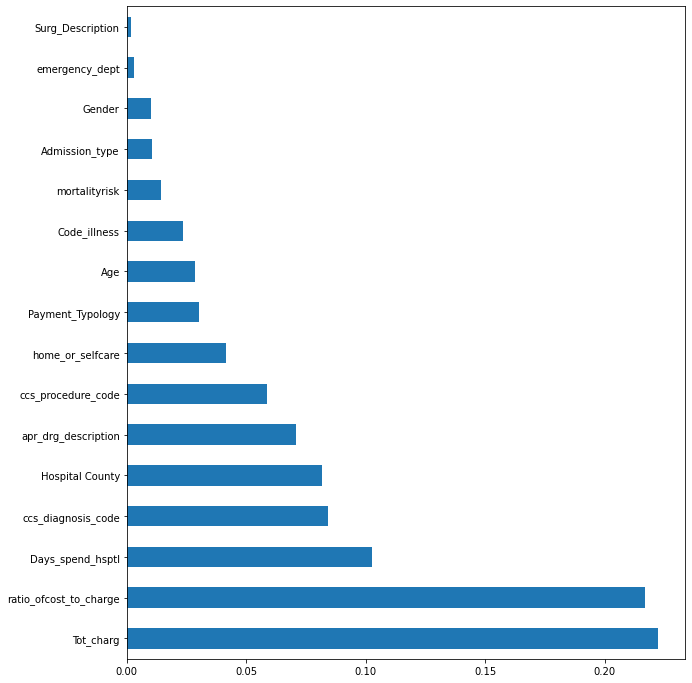

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,12))
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
X.drop(['emergency_dept','Surg_Description'],axis=1)

,Hospital County,Age,Gender,Admission_type,home_or_selfcare,apr_drg_description,Days_spend_hsptl,ccs_diagnosis_code,ccs_procedure_code,Code_illness,mortalityrisk,Tot_charg,ratio_ofcost_to_charge,Payment_Typology
0,1,2,0,0,7,237,4,122,0,1,1,5511.95,1.012798,1
1,1,4,0,5,17,38,4,197,0,3,2,4783.20,1.079365,1
2,1,2,0,5,7,237,3,122,0,1,1,3829.15,1.059379,1
3,1,0,0,5,7,237,1,122,0,1,1,1108.20,1.484167,1
4,1,4,0,0,7,237,3,122,0,2,3,3418.18,0.986161,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,4,0,1,18,28,6,106,29,2,3,69650.41,0.199522,3
1048571,2,0,0,1,7,227,2,8,231,2,1,13587.38,0.288382,3
1048572,2,3,1,1,15,99,13,151,88,4,4,104629.78,0.236516,3
1048573,2,2,0,1,7,109,2,143,86,1,1,27521.41,0.245846,3


In [ ]:
y.value_counts(normalize=True)

1    0.748505
0    0.251495
Name: Result, dtype: float64

### Standardization

In [ ]:
#Standardization
#from sklearn.preprocessing import StandardScaler
#stscaler = StandardScaler().fit(X)
#X = stscaler.transform(X)
#X

In [ ]:
#spliting the data into train and test data to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=None)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.20,random_state=None)

In [ ]:
y_train.value_counts()

1    613600
0    205947
Name: Result, dtype: int64

In [ ]:
y_test.value_counts()

1    153194
0     51693
Name: Result, dtype: int64

# section 1

In [ ]:
## Smotetomek to handle imbalanced data
from collections import Counter
Counter(y_train)

Counter({0: 205947, 1: 613600})

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
smote = SMOTE(random_state=0)
print("The number of classes before fit {}".format(Counter(y_train)))
train_df_smote, y_smote = smote.fit_resample(X_train, y_train)

X_train = train_df_smote
y_train = y_smote

y_train_org = np.argmax(y_train, axis=-1)


print("The number of classes after fit {}".format(Counter(y_train)))

The number of classes before fit Counter({1: 613600, 0: 205947})
The number of classes after fit Counter({0: 613600, 1: 613600})


In [ ]:
print("The number of classes before fit {}".format(Counter(y_test)))
test_df_smote, y_smote = smote.fit_resample(X_test, y_test)

X_test = test_df_smote
y_test = y_smote

y_test_org = np.argmax(y_test, axis=-1)


print("The number of classes after fit {}".format(Counter(y_test)))

The number of classes before fit Counter({1: 153194, 0: 51693})
The number of classes after fit Counter({0: 153194, 1: 153194})


In [ ]:
result_df = {
    "model":[],
    "training_score" :[],
    "testing_score": []
}

def modify_result(model, trainSc, testSc):
    result_df["model"].append(model)
    result_df["training_score"].append(trainSc)
    result_df["testing_score"].append(testSc)

In [ ]:
class_weight=dict({0:100,1:1})

In [49]:
#Random forest classifier after hyperparameter tunning
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 100, 1: 1}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [50]:
y_pred = classifier.predict(X_test)
ytrain_pred =classifier.predict_proba(X_train)
ytest_pred = classifier.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Random forest classifier",
             accuracy_score(classifier.predict(X_train), y_train),
             accuracy_score(y_test,y_pred))

Training Score: 0.9995164177332483
Testing Score:0.8259765293416848


In [51]:
import pickle
with open('model_random','wb') as f:
  pickle.dump(classifier,f)

In [52]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[102325  50869]
 [  7542 145652]]
0.8093561105526326
              precision    recall  f1-score   support

           0       0.93      0.67      0.78    153194
           1       0.74      0.95      0.83    153194

    accuracy                           0.81    306388
   macro avg       0.84      0.81      0.81    306388
weighted avg       0.84      0.81      0.81    306388



In [ ]:
import xgboost 
from xgboost import XGBClassifier
clf =XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = clf.predict(X_test)
ytrain_pred =clf.predict_proba(X_train)
ytest_pred = clf.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("XGboost",
             accuracy_score(clf.predict(X_train), y_train),
             accuracy_score(y_test,y_pred))

Training Score: 0.831832130350952
Testing Score:0.8305535596041647


In [ ]:
import pickle
with open('model_pickle','wb') as f:
  pickle.dump(clf,f)

In [ ]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 98970  54339]
 [    60 153249]]
0.822583801342387
              precision    recall  f1-score   support

           0       1.00      0.65      0.78    153309
           1       0.74      1.00      0.85    153309

    accuracy                           0.82    306618
   macro avg       0.87      0.82      0.82    306618
weighted avg       0.87      0.82      0.82    306618

